## Download dataset

### Configure Kaggle

In [ ]:
import os

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle/kaggle.json

-rw------- 1 root root 67 Jun  1 13:02 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kanchana1990/vehicle-dataset-2024                            Vehicle Dataset 2024                                308KB  2024-05-29 20:02:30            771         28  1.0              
rohit265/credit-card-eligibility-data-determining-factors    Credit Card Eligibility Data: Determining Factors   296KB  2024-05-18 11:31:28           1650         31  1.0              
piterfm/football-soccer-uefa-euro-1960-2024                  Football - Soccer - UEFA EURO, 1960 - 2024           87KB  2024-05-27 19:28:57            725         23  1.0              
hamjashaikh/mental-health-detection-dataset                  Mental Health 

### Download dataset

In [ ]:
!mkdir raw_data

In [ ]:
# Define the directories
raw_data_dir = '/content/raw_data'

# Create the directories if they don't exist
os.makedirs(raw_data_dir, exist_ok=True)

# Move to raw_data dir to download dataset
os.chdir(raw_data_dir)

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer/

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/versions/
License(s): CC0-1.0
100% 65.0M/65.2M [00:04<00:00, 21.5MB/s]
100% 65.2M/65.2M [00:04<00:00, 15.4MB/s]


In [ ]:
!unzip emotion-detection-fer.zip -d emotion-detection-fer

Streaming output truncated to the last 5000 lines.
  inflating: emotion-detection-fer/train/sad/im37.png  
  inflating: emotion-detection-fer/train/sad/im370.png  
  inflating: emotion-detection-fer/train/sad/im3700.png  
  inflating: emotion-detection-fer/train/sad/im3701.png  
  inflating: emotion-detection-fer/train/sad/im3702.png  
  inflating: emotion-detection-fer/train/sad/im3703.png  
  inflating: emotion-detection-fer/train/sad/im3704.png  
  inflating: emotion-detection-fer/train/sad/im3705.png  
  inflating: emotion-detection-fer/train/sad/im3706.png  
  inflating: emotion-detection-fer/train/sad/im3707.png  
  inflating: emotion-detection-fer/train/sad/im3708.png  
  inflating: emotion-detection-fer/train/sad/im3709.png  
  inflating: emotion-detection-fer/train/sad/im371.png  
  inflating: emotion-detection-fer/train/sad/im3710.png  
  inflating: emotion-detection-fer/train/sad/im3711.png  
  inflating: emotion-detection-fer/train/sad/im3712.png  
  inflating: emotion-dete

In [ ]:
# Change directory back to '/content'
os.chdir('/content')
!pwd

/content


### Set up paths and constant variables

In [ ]:
# Define the paths to the training and test data
TRAINING_PATH = '/content/raw_data/emotion-detection-fer/train'
TESTING_PATH  = '/content/raw_data/emotion-detection-fer/test'

In [ ]:
# Change names of certain directories

# Define the folder name mappings
name_mapping = {
    'disgusted': 'disgust',
    'fearful': 'fear',
    'surprised': 'surprise'
}

# Function to rename directories
def rename_directories(path, name_mapping):
    for old_name, new_name in name_mapping.items():
        old_path = os.path.join(path, old_name)
        new_path = os.path.join(path, new_name)
        if os.path.exists(old_path):
            os.rename(old_path, new_path)

# Rename directories in the train path
rename_directories(TRAINING_PATH, name_mapping)

# Rename directories in the test path
rename_directories(TESTING_PATH, name_mapping)

# Verify the changes
print("Train directories:", os.listdir(TRAINING_PATH))
print("Test directories:", os.listdir(TESTING_PATH))

Train directories: ['sad', 'surprise', 'disgust', 'fear', 'neutral', 'angry', 'happy']
Test directories: ['sad', 'surprise', 'disgust', 'fear', 'neutral', 'angry', 'happy']


## Raw Data Analysis

### Data Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Training data
train_counts    = {expression: len(os.listdir(os.path.join(TRAINING_PATH, expression)))
                  for expression in os.listdir(TRAINING_PATH)}
train_counts_df = pd.DataFrame(train_counts, index=['train'])

# Testing data
test_counts     = {expression: len(os.listdir(os.path.join(TESTING_PATH, expression)))
                  for expression in os.listdir(TESTING_PATH)}
test_counts_df  = pd.DataFrame(test_counts, index=['test'])

In [ ]:
print("Number of images in training set:")
print(train_counts_df)


print("\nNumber of images in test set:")
print(test_counts_df)

Number of images in training set:
        sad  surprise  disgust  fear  neutral  angry  happy
train  4830      3171      436  4097     4965   3995   7215

Number of images in test set:
       sad  surprise  disgust  fear  neutral  angry  happy
test  1247       831      111  1024     1233    958   1774


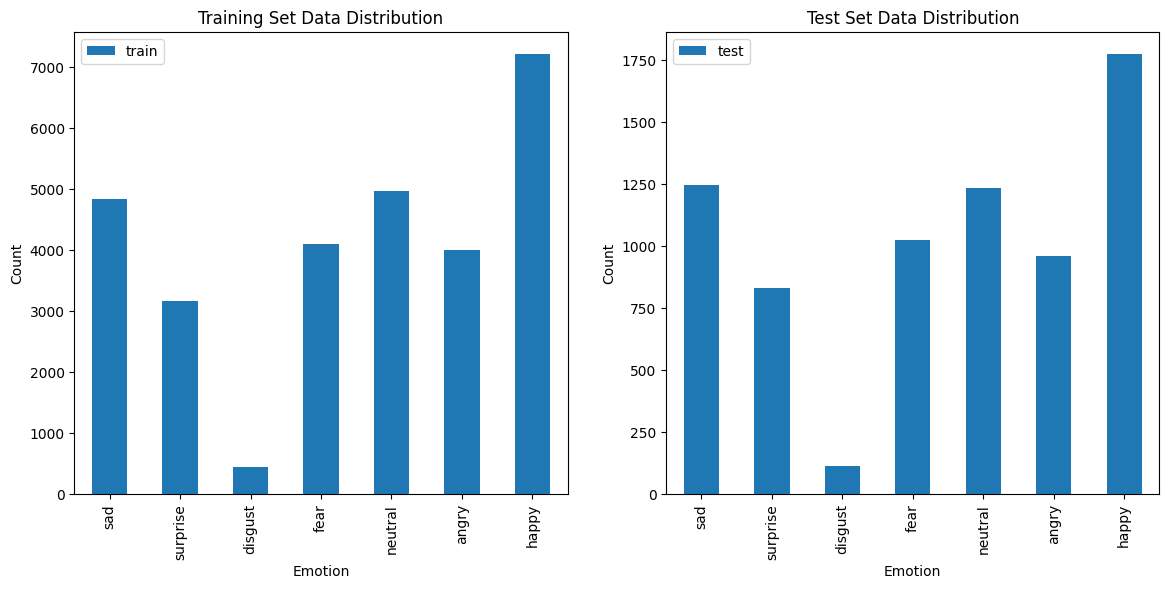

In [ ]:
# Let's understand data distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
train_counts_df.transpose().plot(kind='bar', ax=plt.gca())
plt.title('Training Set Data Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
test_counts_df.transpose().plot(kind='bar', ax=plt.gca())
plt.title('Test Set Data Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

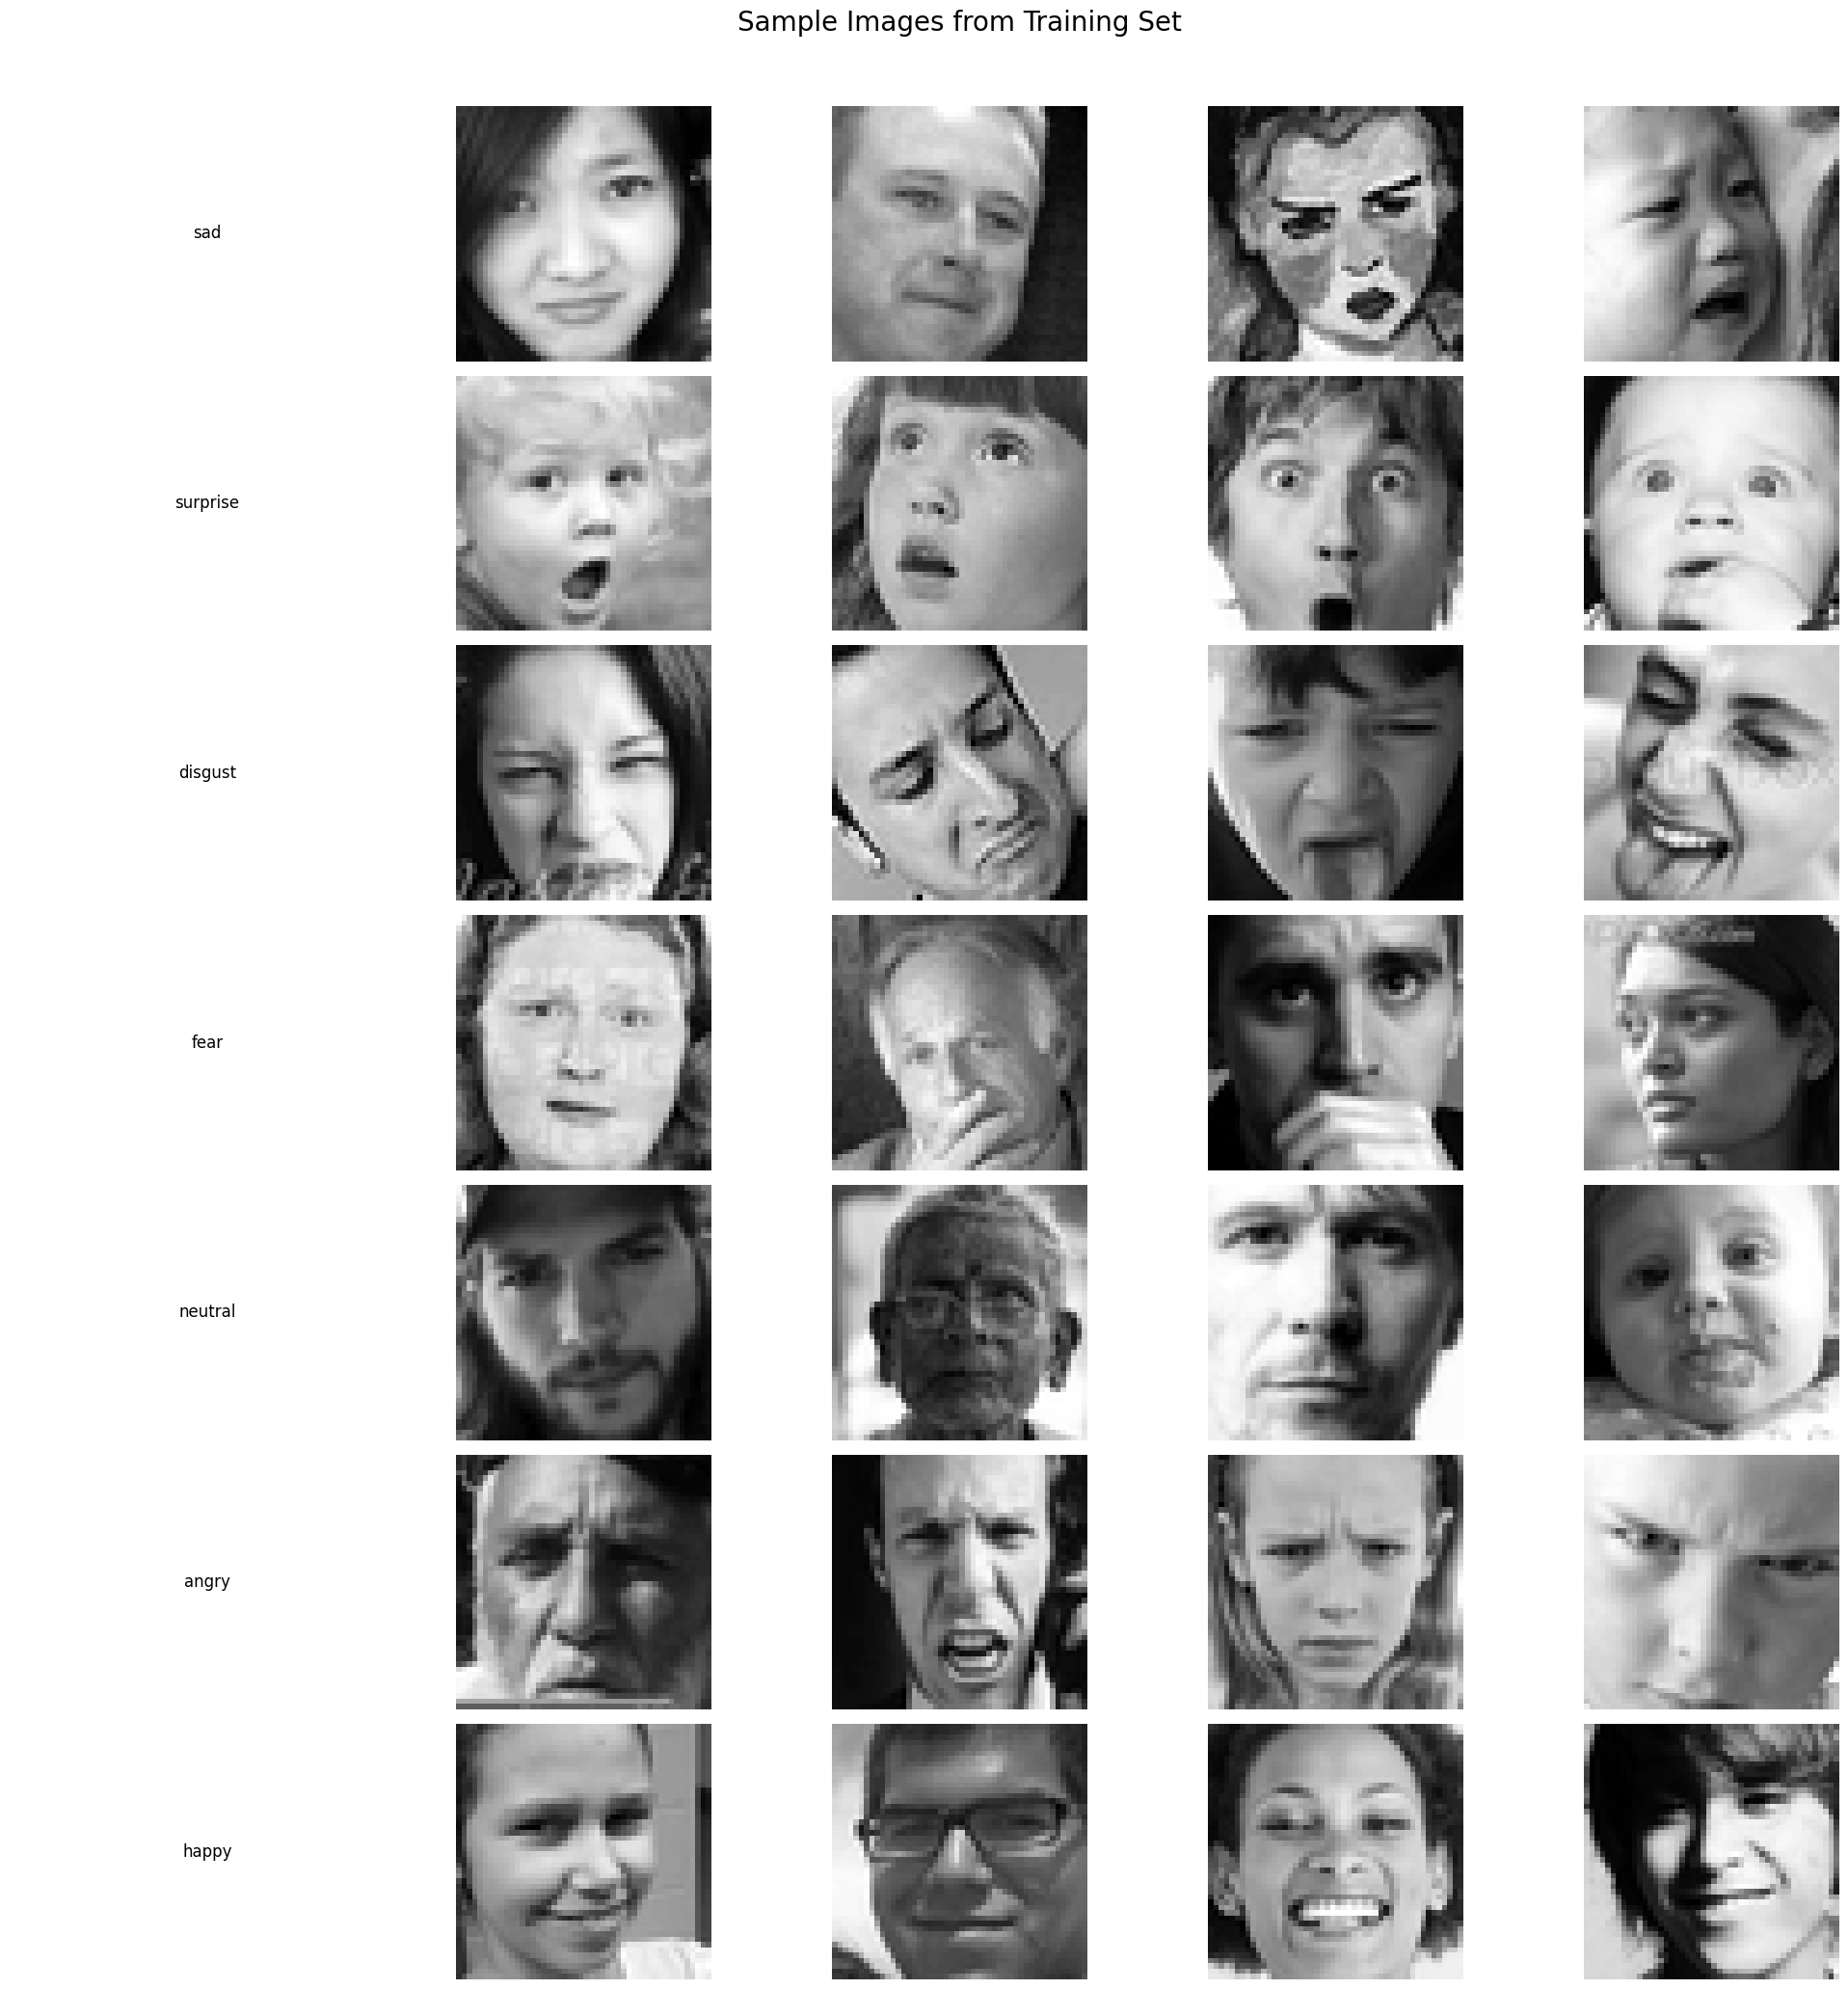

In [ ]:
# Define the number of images to display per emotion
num_images_per_emotion = 4

# Get the list of emotions (folders)
emotions = os.listdir(TRAINING_PATH)

# Calculate the total number of rows needed
num_rows = len(emotions)

# Now, let's plot sample images from each class
plt.figure(figsize=(20, num_rows * 3))

for i, emotion in enumerate(emotions):
    # Display the emotion name in the first column
    plt.subplot(num_rows, num_images_per_emotion + 1, i * (num_images_per_emotion + 1) + 1)
    plt.text(0.5, 0.5, emotion, fontsize=12, ha='center', va='center')
    plt.axis('off')

    # Display the images in the subsequent columns
    for j in range(num_images_per_emotion):
        img_path = os.path.join(TRAINING_PATH, emotion, os.listdir(os.path.join(TRAINING_PATH, emotion))[j])
        img = plt.imread(img_path)
        plt.subplot(num_rows, num_images_per_emotion + 1, i * (num_images_per_emotion + 1) + j + 2)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

plt.suptitle('Sample Images from Training Set', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

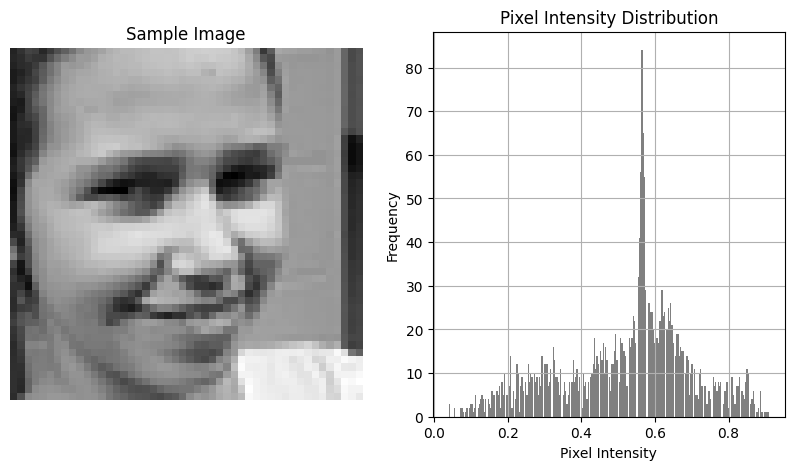

In [ ]:
# Loading and analyzing a sample image to understand pixel intensity distribution
sample_img_path = os.path.join(TRAINING_PATH, 'happy', os.listdir(os.path.join(TRAINING_PATH, 'happy'))[0])
sample_img = plt.imread(sample_img_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_img, cmap='gray')
plt.title('Sample Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(sample_img.ravel(), bins=256, color='gray')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Constants for image preprocessing

IMAGE_SIZE  = (48, 48)
BATCH_SIZE  = 64
SEED        = 42

In [ ]:
# Data preprocessing and augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    validation_split=0.2  # Split training data into training and validation
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
# Generators
train_generator = train_datagen.flow_from_directory(
    TRAINING_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True,
    seed=SEED,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAINING_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True,
    seed=SEED,
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TESTING_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Model Training

### Import libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import datetime

### Constants

In [ ]:
NUM_CLASSES = 7
EPOCHS      = 250

### Train

In [ ]:
# Model creation
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
model = create_model(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1), num_classes=NUM_CLASSES)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 64)        2

In [ ]:
# Callbacks
log_dir               = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
checkpoint            = callbacks.ModelCheckpoint('model_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping        = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr             = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
tensorboard_callback  =  callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger            = callbacks.CSVLogger('training.log')
callbacks_list        = [checkpoint, reduce_lr, csv_logger, tensorboard_callback, early_stopping]

### Train the model!

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    epochs=EPOCHS,
    callbacks=callbacks_list
)

Epoch 1/250
358/358 [==============================] - ETA: 0s - loss: 2.8771 - accuracy: 0.1625
Epoch 1: val_loss improved from inf to 1.96169, saving model to model_detect_emotional.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


358/358 [==============================] - 37s 77ms/step - loss: 2.8771 - accuracy: 0.1625 - val_loss: 1.9617 - val_accuracy: 0.1427 - lr: 1.0000e-04
Epoch 2/250
358/358 [==============================] - ETA: 0s - loss: 2.5943 - accuracy: 0.1787
Epoch 2: val_loss improved from 1.96169 to 1.89756, saving model to model_detect_emotional.h5
358/358 [==============================] - 26s 73ms/step - loss: 2.5943 - accuracy: 0.1787 - val_loss: 1.8976 - val_accuracy: 0.2138 - lr: 1.0000e-04
Epoch 3/250
358/358 [==============================] - ETA: 0s - loss: 2.4202 - accuracy: 0.1851
Epoch 3: val_loss improved from 1.89756 to 1.89090, saving model to model_detect_emotional.h5
358/358 [==============================] - 26s 73ms/step - loss: 2.4202 - accuracy: 0.1851 - val_loss: 1.8909 - val_accuracy: 0.2381 - lr: 1.0000e-04
Epoch 4/250
358/358 [==============================] - ETA: 0s - loss: 2.2867 - accuracy: 0.2007
Epoch 4: val_loss improved from 1.89090 to 1.84811, saving model to mod

## Model evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [ ]:
# Evaluate the model on the test data
evaluation = model.evaluate(test_generator)
print(f"\nTest Accuracy: {evaluation[1] * 100:.2f}%")

113/113 [==============================] - 2s 19ms/step - loss: 1.0383 - accuracy: 0.6060

Test Accuracy: 60.60%


In [ ]:
# Confusion matrix
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred)

113/113 [==============================] - 2s 18ms/step


In [ ]:
# Classification report
class_labels = list(test_generator.class_indices.keys())
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:
               precision    recall  f1-score   support

       angry       0.56      0.49      0.52       958
     disgust       0.51      0.16      0.25       111
        fear       0.48      0.22      0.30      1024
       happy       0.84      0.86      0.85      1774
     neutral       0.46      0.78      0.58      1233
         sad       0.52      0.41      0.46      1247
    surprise       0.68      0.78      0.73       831

    accuracy                           0.61      7178
   macro avg       0.58      0.53      0.53      7178
weighted avg       0.61      0.61      0.59      7178



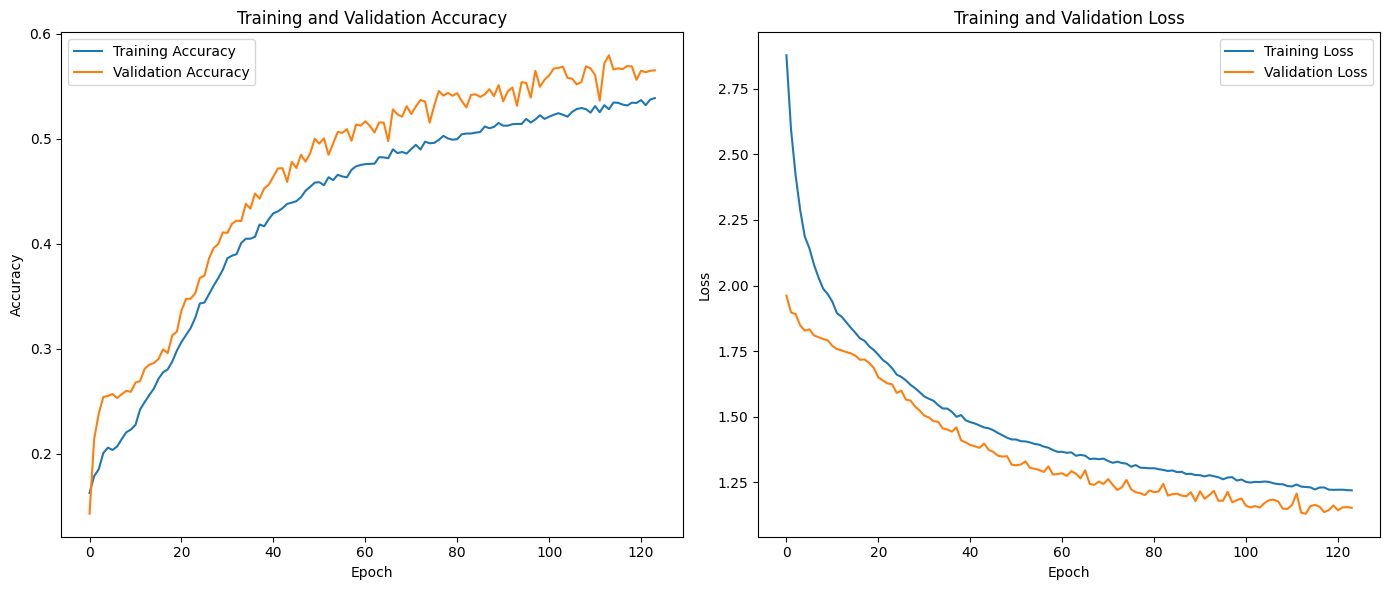

In [ ]:
# Plotting training history
if 'accuracy' in history.history:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("The 'history' object does not contain accuracy or loss information.")

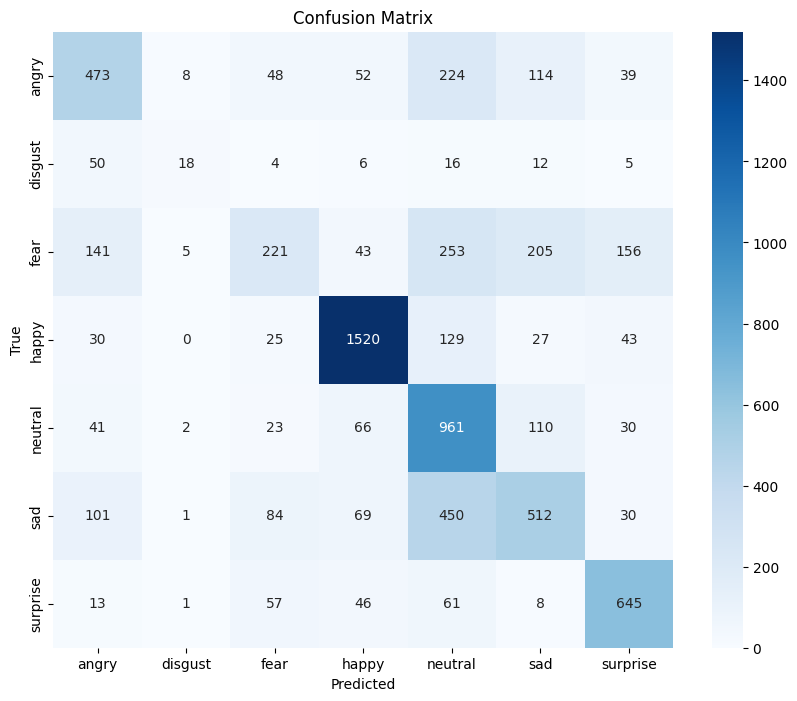

In [ ]:
# Confusion matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

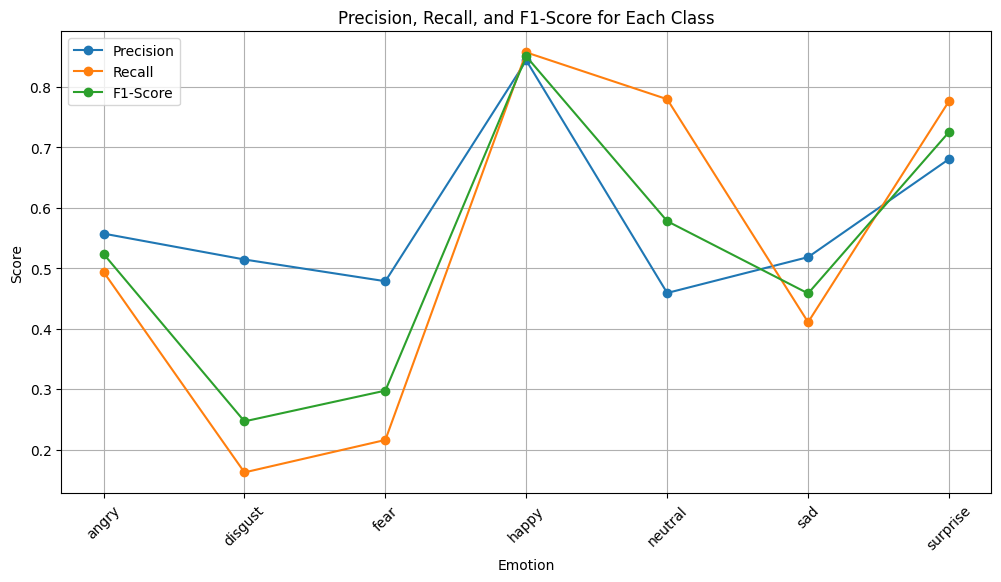

In [ ]:
# Plotting precision, recall, and F1-score for each class
metrics = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
precision = [metrics[label]['precision'] for label in class_labels]
recall = [metrics[label]['recall'] for label in class_labels]
f1_score = [metrics[label]['f1-score'] for label in class_labels]

plt.figure(figsize=(12, 6))
plt.plot(class_labels, precision, marker='o', label='Precision')
plt.plot(class_labels, recall, marker='o', label='Recall')
plt.plot(class_labels, f1_score, marker='o', label='F1-Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xlabel('Emotion')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Save the model

In [ ]:
# Save the model (if applicable)
model_path = '/content/drive/MyDrive/Models/cnn_emotion_detection.h5'
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
